In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from projet_6_bis_iteration_friendly import *
from components.computation.compute_nusselt import *
from IPython.display import clear_output

In [ ]:

# --- Paramètres du domaine et numérique ---
nx, ny = 31, 31
Lx, Ly = 1.0, 1.0
dt = 1e-3  # à ajuster si ça diverge à grand Re/Ra

dx = Lx/(nx-1)
dy = Ly/(ny-1)

# --- Grilles de paramètres ---
nu = 1.57e-5
Re_list = [100]              # -> plusieurs Re
Ra_list = np.arange(1,6)*1e4                # -> plusieurs Ra
Pr = 0.71

res_dict = {}

clear_output()
for i, Re in enumerate(Re_list):
    res_dict[Re] = {}
    for j, Ra in enumerate(Ra_list):
        U0, res_dict[Re][Ra]= global_resolution(nx, ny, Lx, Ly, dt, nu, Re, Ra)
        res_dict[Re][Ra]['U0'] = U0
        clear_output()

Itération 0: Résidu Nu = 1.00e+00, Résidu w = inf, Résidu T = 1.25e-02
Itération 10: Résidu Nu = 1.00e+00, Résidu w = 8.40e-02, Résidu T = 9.83e-03
Itération 20: Résidu Nu = 1.00e+00, Résidu w = 3.70e-02, Résidu T = 7.89e-03
Itération 30: Résidu Nu = 1.00e+00, Résidu w = 2.31e-02, Résidu T = 6.51e-03
Itération 40: Résidu Nu = 1.00e+00, Résidu w = 1.75e-02, Résidu T = 5.49e-03
Itération 50: Résidu Nu = 1.00e+00, Résidu w = 1.48e-02, Résidu T = 4.73e-03
Itération 60: Résidu Nu = 1.00e+00, Résidu w = 1.34e-02, Résidu T = 4.15e-03
Itération 70: Résidu Nu = 1.00e+00, Résidu w = 1.25e-02, Résidu T = 3.70e-03
Itération 80: Résidu Nu = 1.00e+00, Résidu w = 1.18e-02, Résidu T = 3.33e-03
Itération 90: Résidu Nu = 1.00e+00, Résidu w = 1.12e-02, Résidu T = 3.03e-03
Itération 100: Résidu Nu = 1.00e+00, Résidu w = 1.06e-02, Résidu T = 2.78e-03
Itération 110: Résidu Nu = 1.00e+00, Résidu w = 1.01e-02, Résidu T = 2.57e-03
Itération 120: Résidu Nu = 1.00e+00, Résidu w = 9.52e-03, Résidu T = 2.39e-03
It

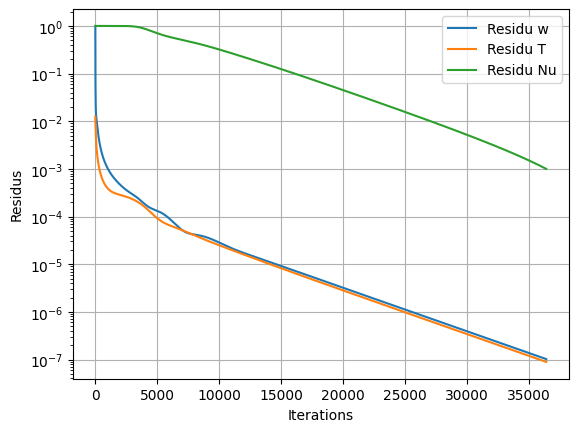

KeyError: np.float64(20000.0)

In [ ]:
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        res_w_plot = res_dict[Re][Ra]['res_w']
        res_T_plot = res_dict[Re][Ra]['res_T']
        res_Nu_plot = res_dict[Re][Ra]['res_Nu']
        plt.plot(res_w_plot, label = 'Residu w')
        plt.plot(res_T_plot, label = 'Residu T')
        plt.plot(res_Nu_plot, label = 'Residu Nu')
        plt.legend()
        plt.yscale('log')
        plt.grid()
        plt.xlabel('Iterations')
        plt.ylabel('Residus')
        plt.show()

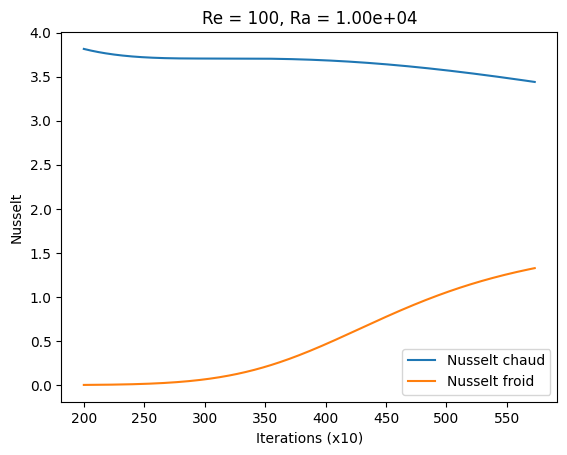

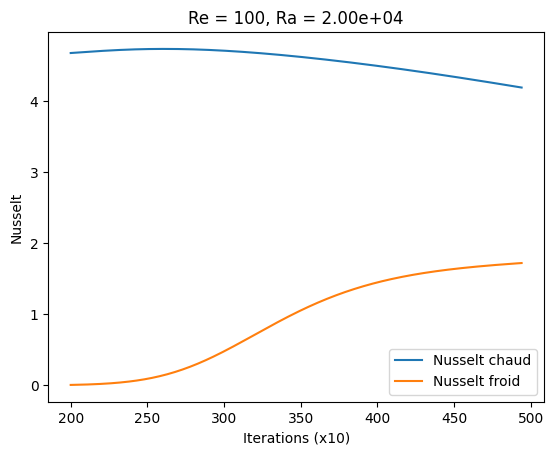

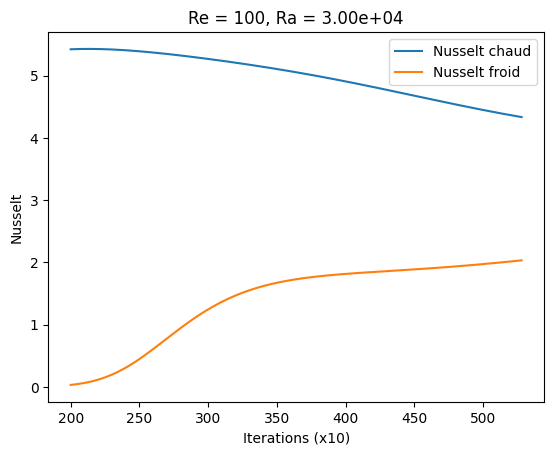

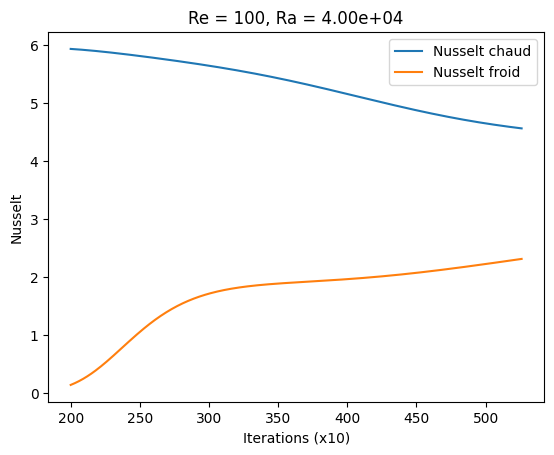

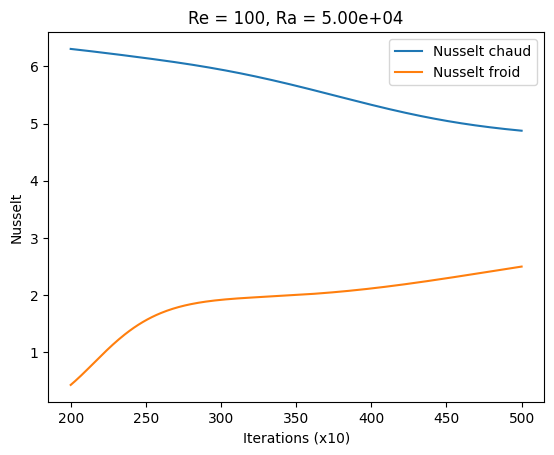

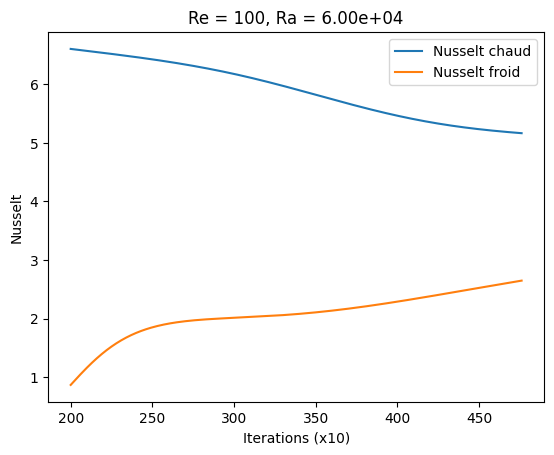

In [ ]:
kmin = 200
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        Nu_hot_plot = []
        Nu_cold_plot = []
        for k in range(len(res_dict[Re][Ra]['T'])):
            if k >= kmin:
                Nu_hot_plot.append(get_average_nusselt(res_dict[Re][Ra]['T'][k], dx)[0])
                Nu_cold_plot.append(get_average_nusselt(res_dict[Re][Ra]['T'][k], dx)[1])
        plt.plot(np.arange(len(Nu_hot_plot))+200, Nu_hot_plot, label = 'Nusselt chaud')
        plt.plot(np.arange(len(Nu_hot_plot))+200, Nu_cold_plot, label = 'Nusselt froid')
        plt.legend()
        plt.xlabel('Iterations (x10)')
        plt.ylabel('Nusselt')
        plt.title(f"Re = {Re:.0f}, Ra = {Ra:.2e}")
        plt.show()

In [ ]:
plt.figure()

for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(list(Re_list.keys())):
        res_dict[Re][Ra]['Nu'] = get_average_nusselt(res_dict[Re][Ra]['T'][-1], dx)[0]

# --- Courbes numériques ---
for i, Re in enumerate(Re_list):
    plt.plot(res_dict[Re].keys(), [res_dict[Re][k]['Nu'] for k in res_dict[Re].keys()], marker="o", label=f"Re={Re:.2e}")

# --- Choix du Re de référence (ex: Re = 100) ---
Re_ref = np.min(list(res_dict.keys()))

# --- Droite théorique : pente 1/4 ---
Ra_th = np.array(Ra_list, dtype=float)

Ra0 = Ra_th[0]
Nu0 = res_dict[Re_ref][Ra0]['Nu']

C = Nu0 / (Ra0**(1/3))
Nu_th = C * Ra_th**(1/3)

plt.plot(
    Ra_th,
    Nu_th,
    "k--",
    linewidth=2,
    label=r"Droite théorique : $Nu \sim Ra^{1/3}$"
)

# --- Mise en forme ---
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra) — superposition avec la loi $Ra^{1/3}$")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


KeyError: 'Nu'

<Figure size 640x480 with 0 Axes>

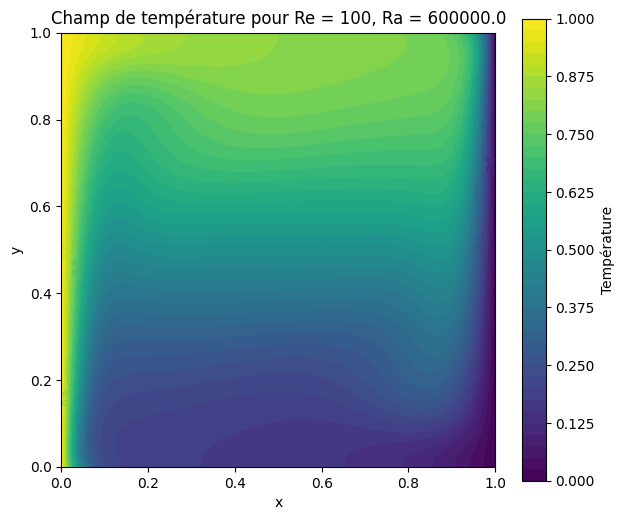

In [ ]:
# 1. Préparation de la grille
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Sélection d'une itération (ex: la dernière enregistrée)
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        T_plot = res_dict[Re][Ra]['T'][-1]
        Re_plot = Re_list[i]
        Ra_plot = Ra_list[j]

        plt.figure(figsize=(7, 6))
        levels = 40

        cf = plt.contourf(X, Y, T_plot, levels=levels)   # champ coloré
        cs = plt.contour(X, Y, T_plot, levels=11, linewidths=0.8)  # isothermes
        plt.clabel(cs, inline=True, fontsize=8)

        plt.colorbar(cf, label="Température")
        plt.title("Champ de température pour Re = " + str(Re_plot) + ", Ra = " + str(Ra_plot))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, Lx)
        plt.ylim(0, Ly)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()


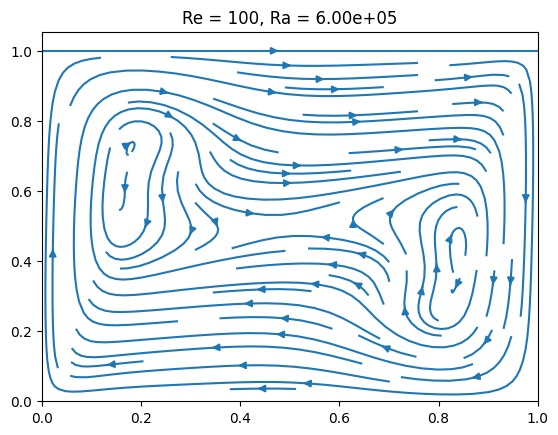

In [ ]:
x, y = np.linspace(0,1,nx), np.linspace(0,1,ny)
X,Y = np.meshgrid(x,y)

for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        u_plot, v_plot = res_dict[Re][Ra]['u'][-1], res_dict[Re][Ra]['v'][-1]
        plt.streamplot(X,Y,u_plot,v_plot)
        plt.title(f'Re = {Re:.0f}, Ra = {Ra:.2e}')
        plt.show()